Accuracy: 57.91%


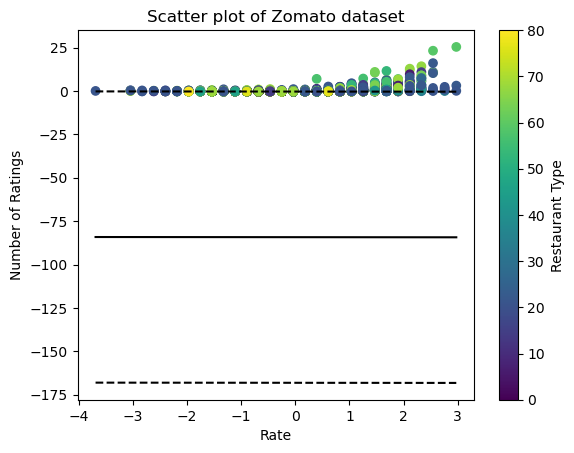

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('zomato.csv')

df = df.dropna()

label_encoders = {}
for column in ['restaurant name', 'restaurant type', 'online_order', 'table booking', 'cuisines type', 'area']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['rate (out of 5)', 'num of ratings', 'avg cost (two people)', 'online_order', 'table booking', 'cuisines type', 'area']].values
y = df['restaurant type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Rate')
plt.ylabel('Number of Ratings')
plt.title('Scatter plot of Zomato dataset')
plt.colorbar(label='Restaurant Type')

w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
yy = a * xx - svm_classifier.intercept_[0] / w[1]

plt.plot(xx, yy, 'k-')
yy_down = yy - 1 / w[1]
yy_up = yy + 1 / w[1]
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()